# Data Visualization

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from IPython import display 

from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier

In [3]:
!git clone https://github.com/nghi-huynh/BigDataChallenge2022.git

Cloning into 'BigDataChallenge2022'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 168 (delta 57), reused 134 (delta 26), pack-reused 0
Receiving objects: 100% (168/168), 29.68 MiB | 33.54 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [3]:
!mv /content/BigDataChallenge2022/processed_data .
!rm -r /content/BigDataChallenge2022

In [4]:
df = pd.read_csv('/content/processed_data/final_processed_data.csv')

In [5]:
df

,Entity,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income group,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
0,Afghanistan,2000,17.939269,0.442532,0.090314,1.683090e+10,489.923884,47.922003,9.861581,10.806,Low income,530.0,1.893882,7.7
1,Afghanistan,2001,17.933525,0.457531,0.084862,1.683090e+10,489.923884,47.922003,9.861581,10.809,Low income,530.0,1.963984,7.9
2,Afghanistan,2002,17.916547,0.461904,0.081991,4.055180e+09,179.426579,15.803164,9.443390,11.257,Low income,530.0,2.090646,7.9
3,Afghanistan,2003,17.889702,0.490590,0.081942,4.515559e+09,190.683814,17.035744,8.941258,11.141,Low income,530.0,2.240707,7.7
4,Afghanistan,2004,17.859903,0.514944,0.082468,5.226779e+09,211.382074,20.412764,9.808474,10.988,Low income,530.0,2.360176,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,Zimbabwe,2015,11.156429,1.676438,1.413464,1.996312e+10,1445.069702,107.686999,7.452066,4.778,Lower middle income,1280.0,2.193166,30.7
3256,Zimbabwe,2016,11.164133,1.747906,1.445058,2.054868e+10,1464.588957,112.411404,7.675163,4.788,Lower middle income,1290.0,2.279813,28.7
3257,Zimbabwe,2017,11.170427,1.804474,1.470020,1.758489e+10,1235.189032,115.646201,7.469752,4.785,Lower middle income,1390.0,2.364265,25.9
3258,Zimbabwe,2018,11.158765,1.870430,1.378207,1.811554e+10,1254.642265,141.369308,8.680062,4.796,Lower middle income,1410.0,2.472949,23.9


## Bar plots

In [8]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

#change_width(ax, .35)

In [7]:
def bar_plot(df, x, y, x_label=None,y_label=None,order=None):
  sns.set_style("whitegrid")
  #plt.figure(figsize=(16,8))
  fig, ax = plt.subplots(figsize=(9,6))
  sns.barplot(x=df[x], y=df[y], palette='PuRd',order=order,capsize=0.05)
  change_width(ax,0.50)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(f'{x_label} - {y_label} bar plot', fontsize=14, fontweight='bold')
  #plt.show()

### Income Group - Suicide Rate

In [7]:
order = ['Low income','Lower middle income','Upper middle income','High income']

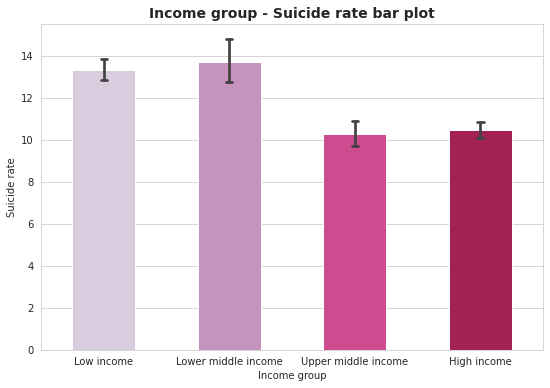

In [54]:
# Income Group and Suicide count bar plot
bar_plot(df,'Income group', 'Suicide rate','Income group','Suicide rate',order)
plt.show()

### Income Group-Unemployment Rate

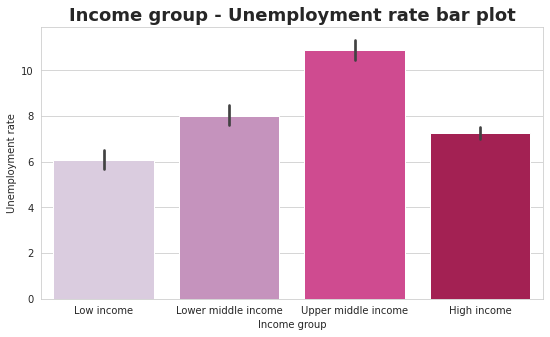

In [151]:
bar_plot(df,'Income group','unemployment rate','Income group','Unemployment rate',order)

### Income Group-Mental Death

In [55]:
df.columns

Index(['Entity', 'Year',
       'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)',
       'Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)',
       'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
       'health expenditure (% GDP)', 'unemployment rate', 'Income group',
       'Income',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Suicide rate'],
      dtype='object')

In [6]:
order = ['Low income','Lower middle income','Upper middle income','High income']

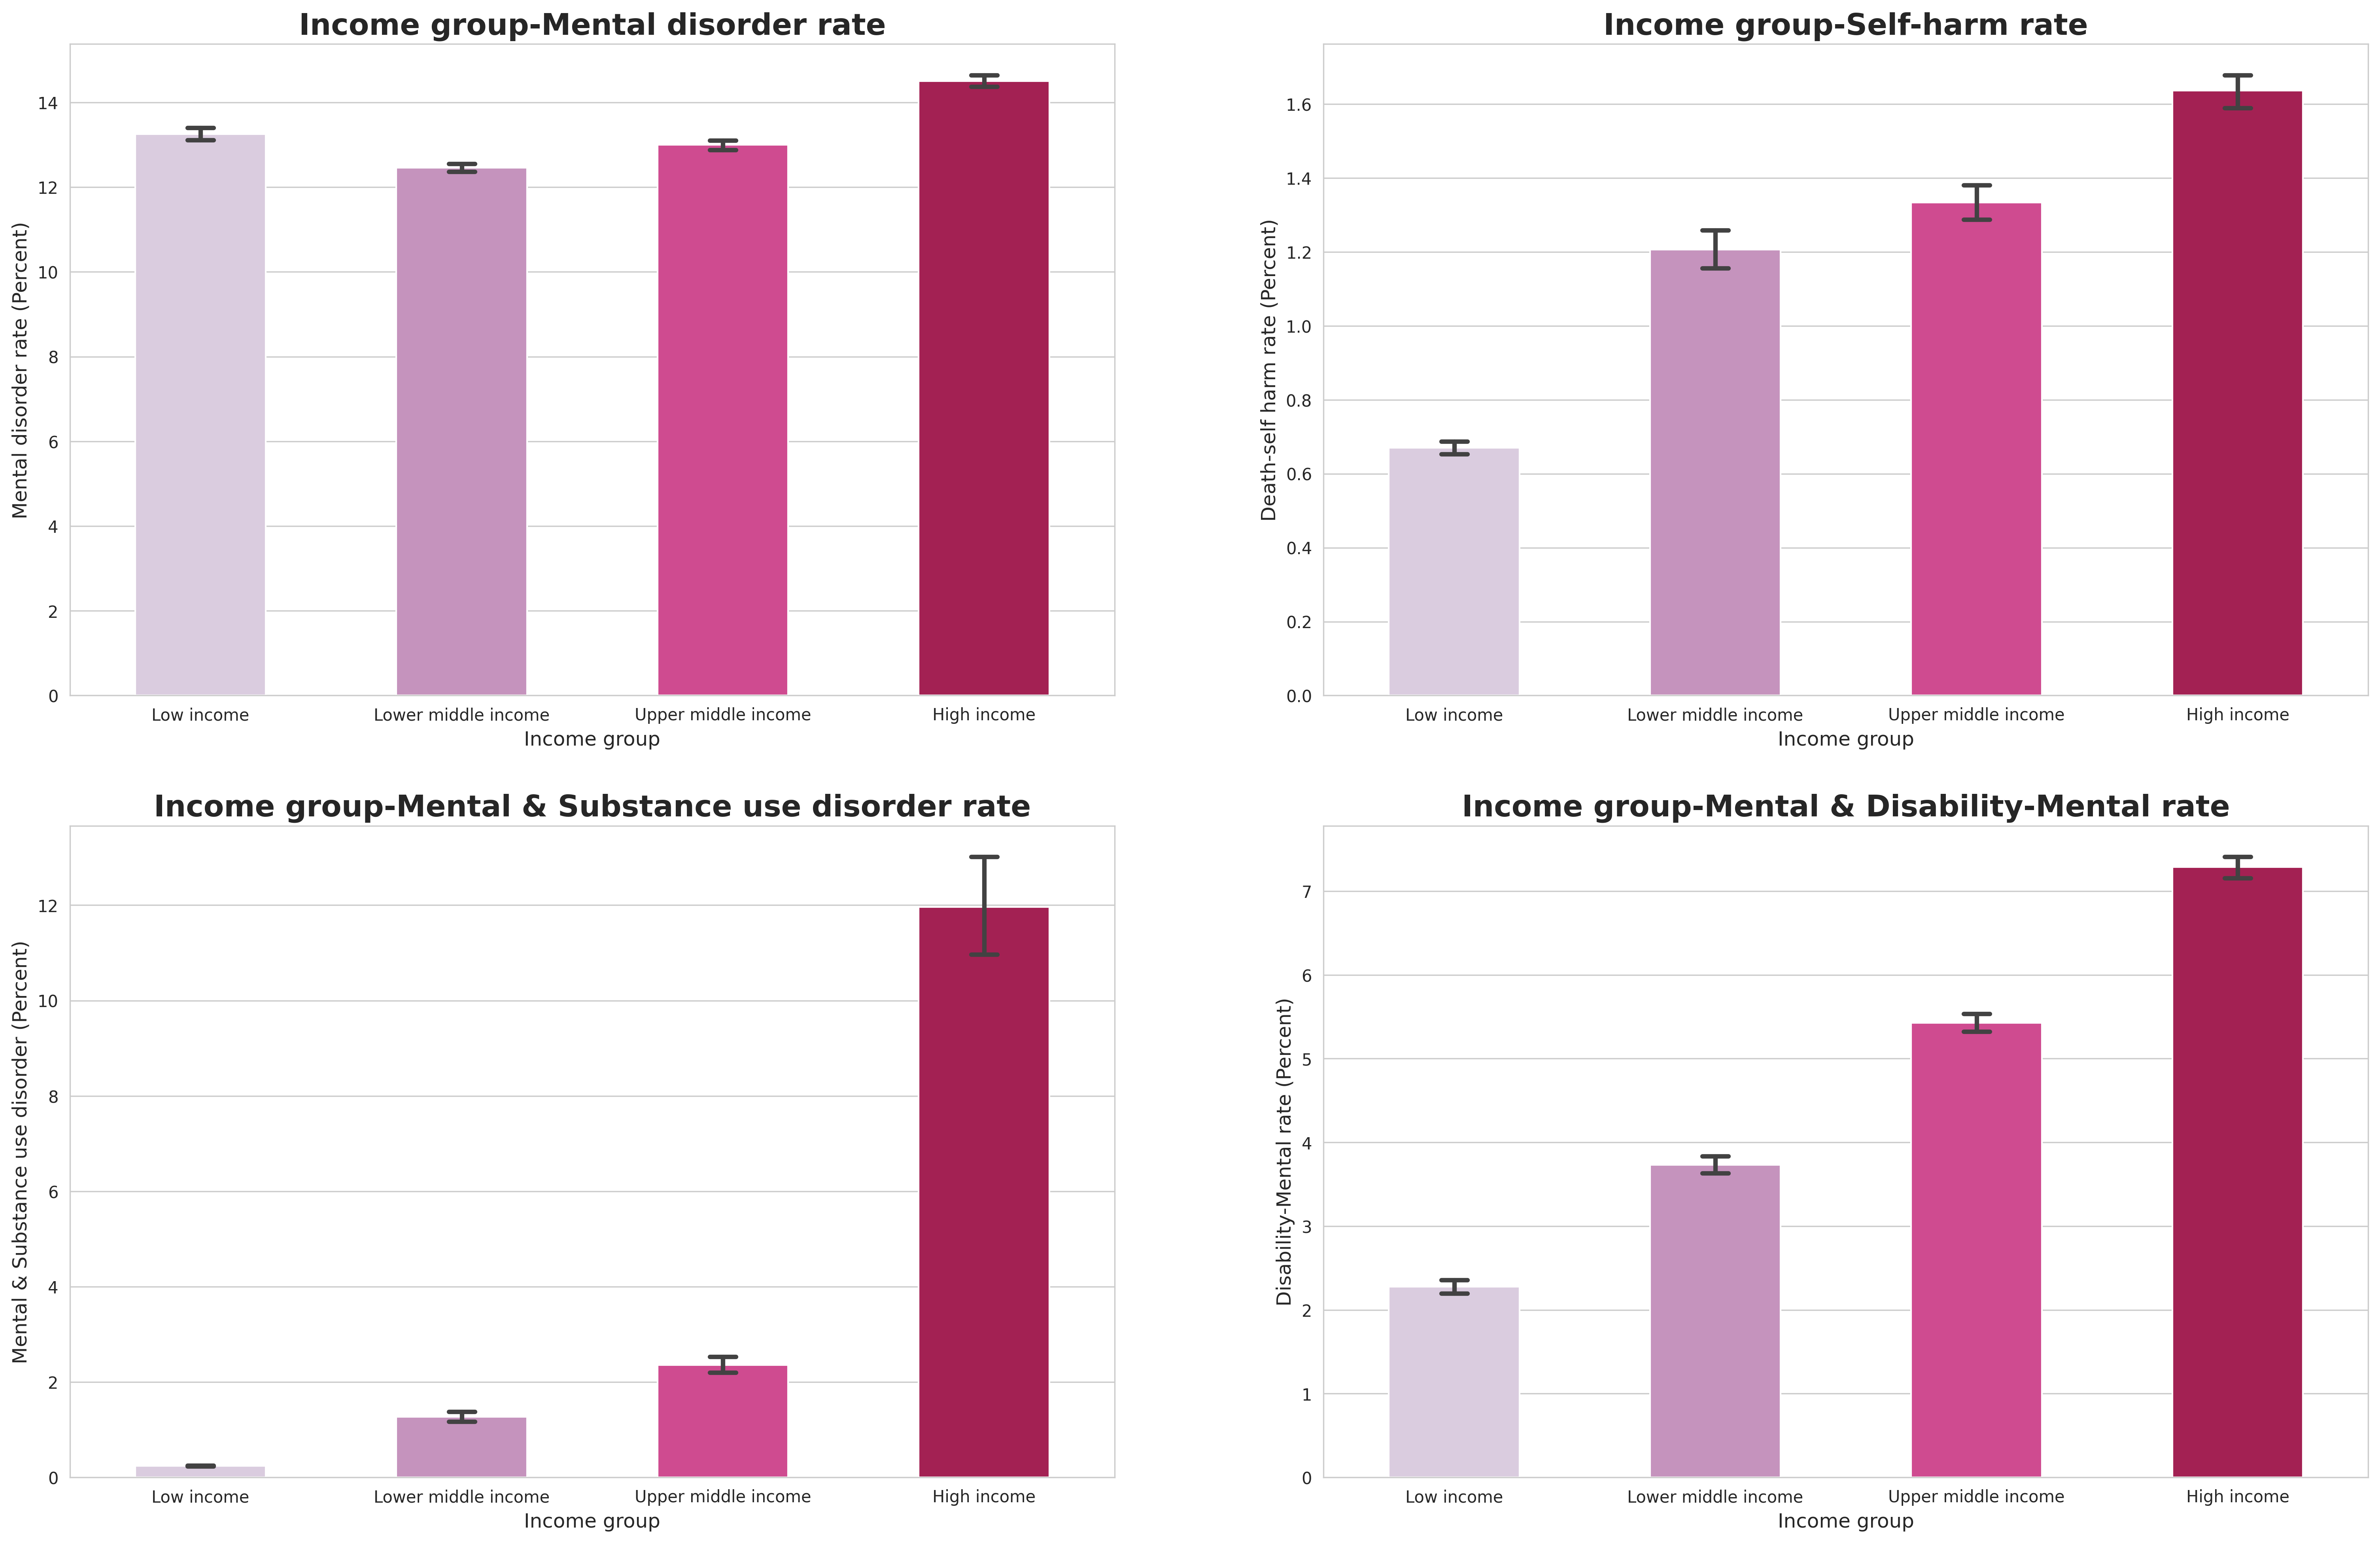

In [64]:
fig, axes = plt.subplots(2, 2,figsize=(25,16),dpi=300)


sns.barplot(ax=axes[0][0],x=df['Income group'], y=df['Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)'], palette='PuRd', order=order,capsize=0.1)
sns.barplot(ax=axes[0][1],x=df['Income group'],y=df['Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)'],palette='PuRd',order=order,capsize=0.1)
sns.barplot(ax=axes[1][0],x=df['Income group'],y=df['Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)'],palette='PuRd',order=order,capsize=0.1)
sns.barplot(ax=axes[1][1],x=df['Income group'],y=df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'],palette='PuRd',order=order,capsize=0.1)

change_width(axes[0][0], .5)
change_width(axes[0][1], .5)
change_width(axes[1][0], .5)
change_width(axes[1][1], .5)


axes[0][0].set_ylabel('Mental disorder rate (Percent)',fontsize=12)
axes[0][0].set_xlabel('Income group',fontsize=12)
axes[0][0].set_title('Income group-Mental disorder rate',fontsize=18, fontweight='bold')


axes[0][1].set_ylabel('Death-self harm rate (Percent)',fontsize=12)
axes[0][1].set_xlabel('Income group',fontsize=12)
axes[0][1].set_title('Income group-Self-harm rate',fontsize=18, fontweight='bold')

axes[1][0].set_ylabel('Mental & Substance use disorder (Percent)',fontsize=12)
axes[1][0].set_xlabel('Income group',fontsize=12)
axes[1][0].set_title('Income group-Mental & Substance use disorder rate',fontsize=18, fontweight='bold')

axes[1][1].set_ylabel('Disability-Mental rate (Percent)',fontsize=12)
axes[1][1].set_xlabel('Income group',fontsize=12)
axes[1][1].set_title('Income group-Mental & Disability-Mental rate',fontsize=18, fontweight='bold')

fig.show()

In [30]:
!pip install matplotlib==3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.7 MB/s 
     |████████████████████████████████| 930 kB 38.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


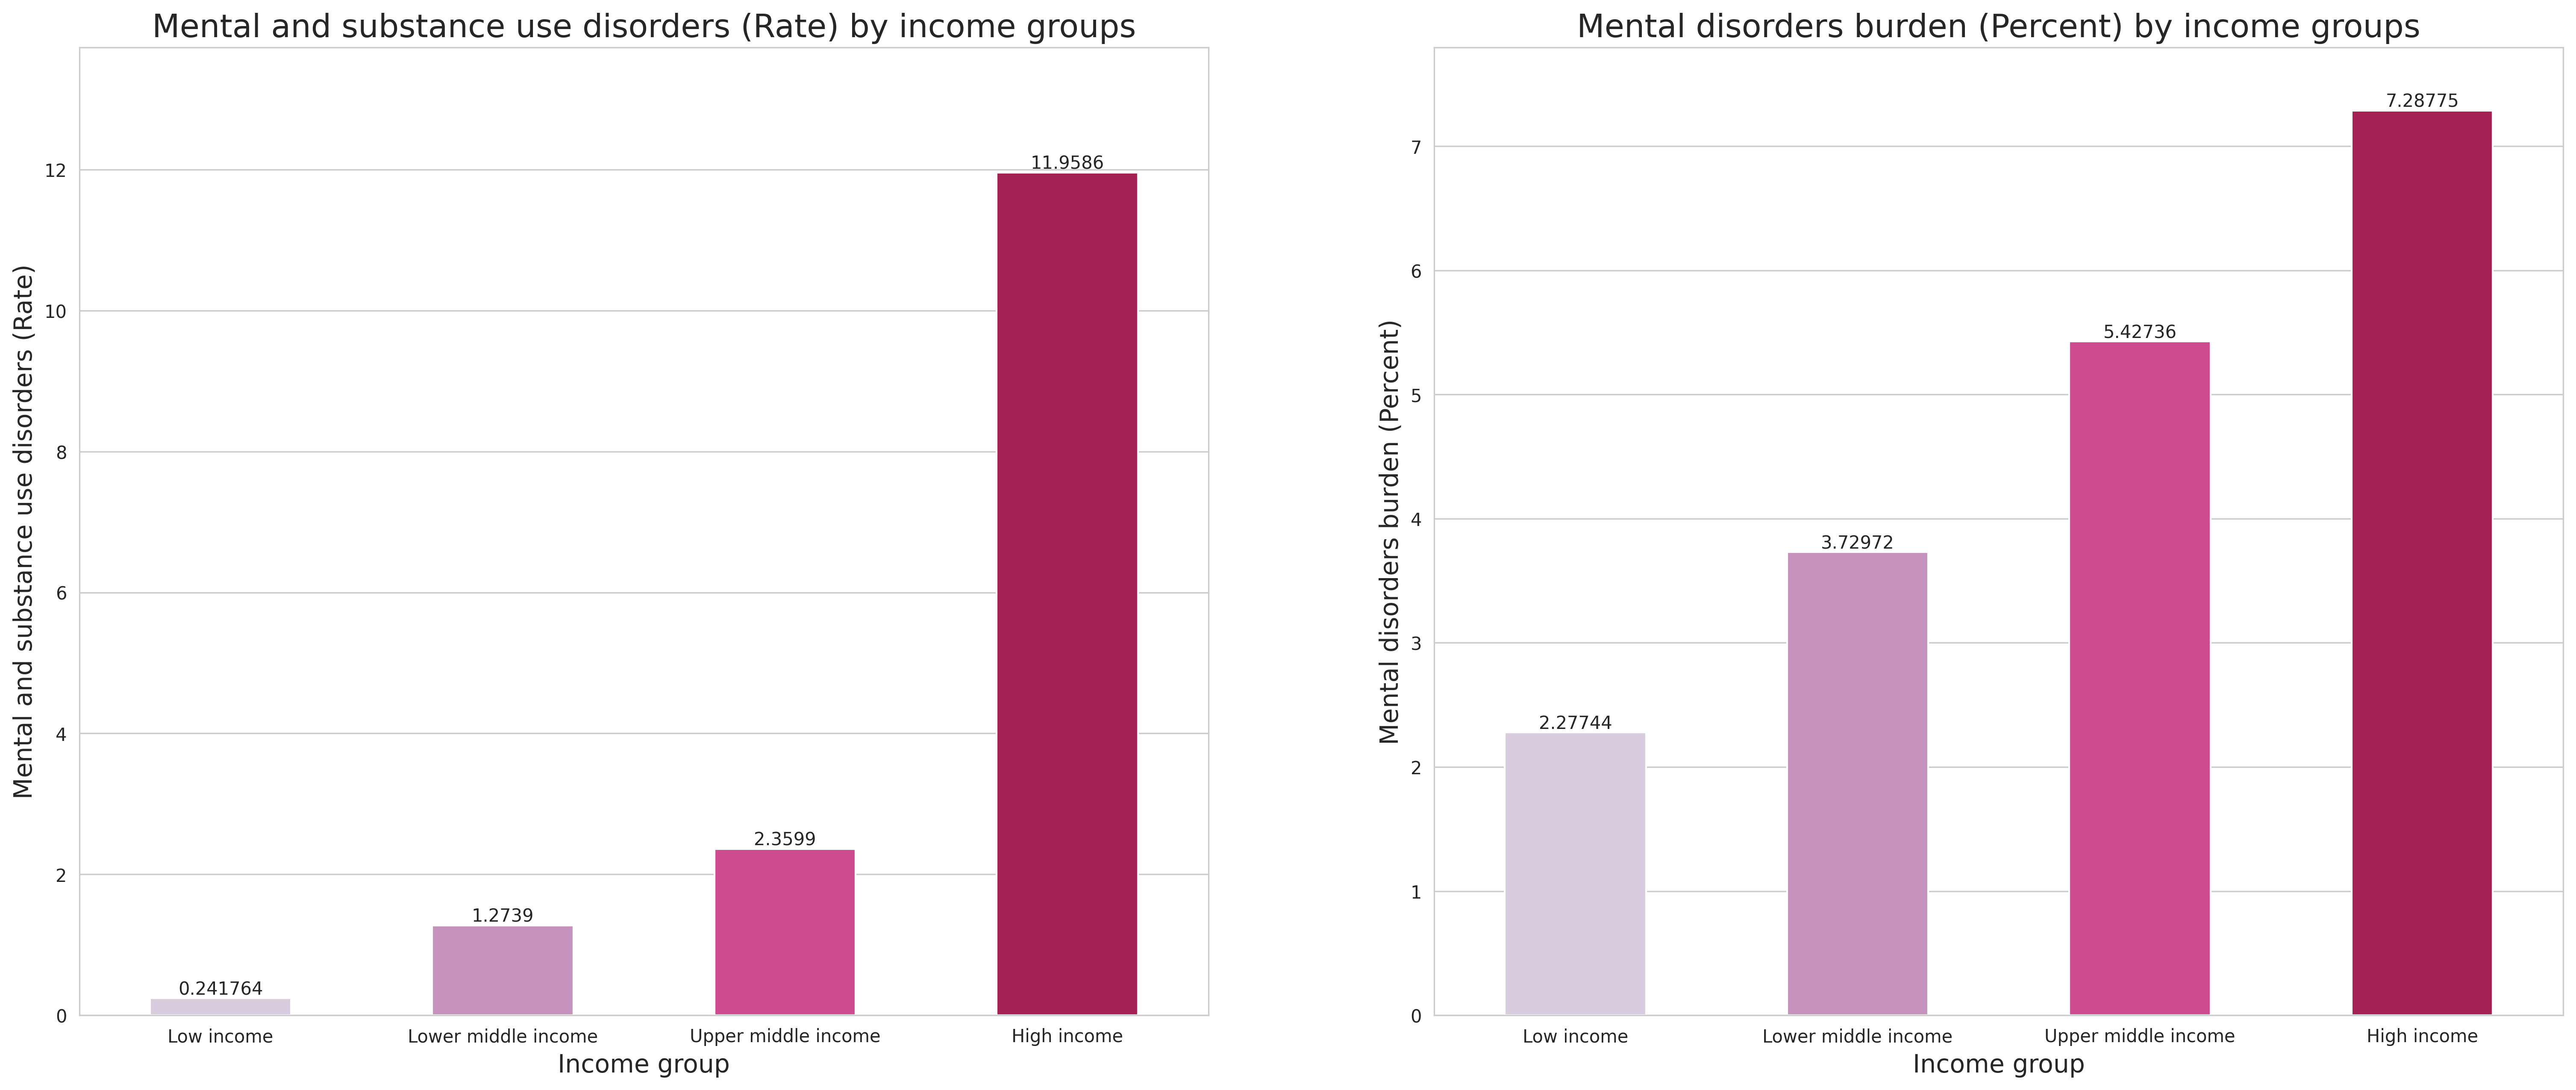

In [14]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2,figsize=(25,10),dpi=300)


ax1 = sns.barplot(ax=axes[0],x=df['Income group'],y=df['Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)'],palette='PuRd',order=order,errwidth=0)

ax2 = sns.barplot(ax=axes[1],x=df['Income group'],y=df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'],palette='PuRd',order=order,errwidth=0)

change_width(axes[0], .5)
change_width(axes[1], .5)

ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])


axes[0].set_ylabel('Mental and substance use disorders (Rate)',fontsize=14)
axes[0].set_xlabel('Income group',fontsize=14)
axes[0].set_title('Mental and substance use disorders (Rate) by income groups',fontsize=18)


axes[1].set_ylabel('Mental disorders burden (Percent)',fontsize=14)
axes[1].set_xlabel('Income group',fontsize=14)
axes[1].set_title('Mental disorders burden (Percent) by income groups',fontsize=18)


fig.show()

In [17]:
axes[1]

## Correlation matrix

In [57]:
#Scaling the numerical data columns with RobustScalar

numerical = ['Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)',
       'Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)',
       'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
       'health expenditure (% GDP)', 'unemployment rate','Income',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Suicide rate']

from sklearn.preprocessing import StandardScaler

df1 = df.copy()
rc = StandardScaler()
df1[numerical] = rc.fit_transform(df1[numerical])

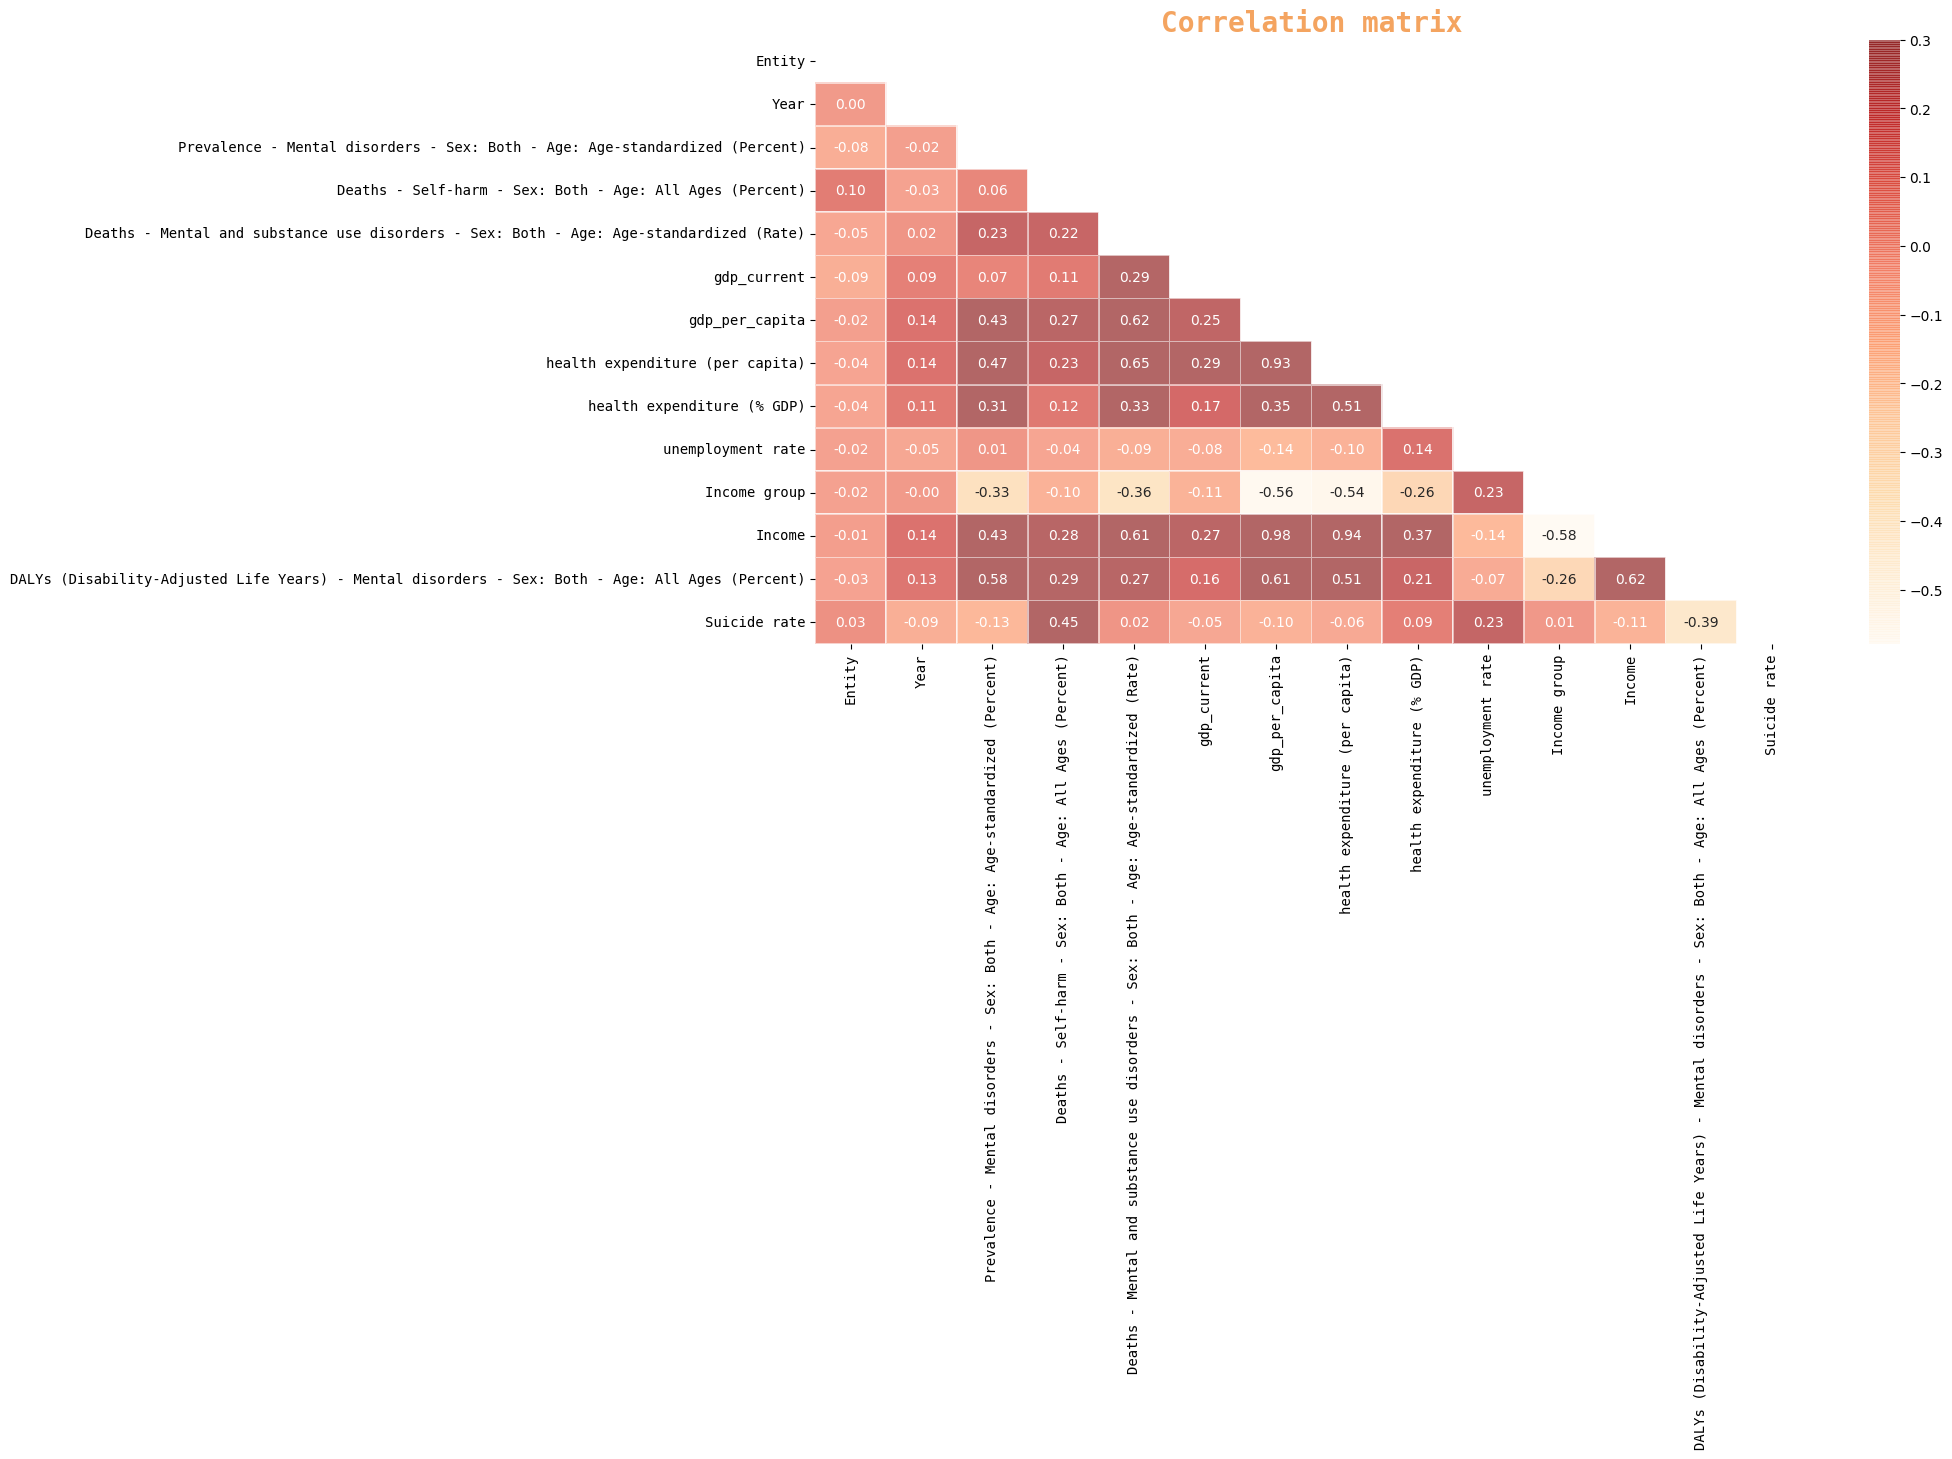

In [59]:
#df1 = df.copy()

from sklearn.preprocessing import LabelEncoder
cols = ['Entity','Year','Income group']

encoder = LabelEncoder()
for col in cols:
    encoder.fit(df1[col])
    df1[col] = encoder.transform(df1[col])

plt.figure(figsize = (16, 8), dpi = 100)

corr = df1.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr,
            mask = mask,
            cmap = 'OrRd',
            vmax=.3,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            alpha = 0.6)

hfont = {'fontname':'monospace'}
plt.xticks(**hfont)
plt.yticks(**hfont)

plt.title('Correlation matrix',
          family = 'monospace',
          fontsize = 20,
          weight = 'semibold',
          color = 'sandybrown')

plt.show()

In [60]:
df1.dtypes

Entity                                                                                               int64
Year                                                                                                 int64
Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)                        float64
Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)                                           float64
Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)             float64
gdp_current                                                                                        float64
gdp_per_capita                                                                                     float64
health expenditure (per capita)                                                                    float64
health expenditure (% GDP)                                                                         float64
unemployment rate                    

In [63]:
df1

,Entity,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income group,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
0,0,0,2.388656,-1.114461,-0.439487,-0.271974,-0.620916,-0.522199,1.589347,0.383767,1,-0.629072,-1.282843,-0.404388
1,0,1,2.385691,-1.094648,-0.440036,-0.271974,-0.620916,-0.522199,1.589347,0.384239,1,-0.629072,-1.254075,-0.384319
2,0,2,2.376928,-1.088871,-0.440325,-0.287167,-0.638894,-0.543751,1.414338,0.454656,1,-0.629072,-1.202096,-0.384319
3,0,3,2.363072,-1.050976,-0.440330,-0.286619,-0.638242,-0.542924,1.204201,0.436423,1,-0.629072,-1.140515,-0.404388
4,0,4,2.347691,-1.018805,-0.440277,-0.285773,-0.637043,-0.540658,1.567122,0.412375,1,-0.629072,-1.091487,-0.394354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,162,15,-1.112276,0.515544,-0.306320,-0.268249,-0.565615,-0.482096,0.580989,-0.563723,2,-0.582777,-1.160024,1.903517
3256,162,16,-1.108300,0.609955,-0.303140,-0.267552,-0.564485,-0.478926,0.674352,-0.562152,2,-0.582159,-1.124467,1.702830
3257,162,17,-1.105051,0.684682,-0.300628,-0.271077,-0.577767,-0.476756,0.588390,-0.562623,2,-0.575987,-1.089810,1.421867
3258,162,18,-1.111070,0.771809,-0.309868,-0.270446,-0.576640,-0.459495,1.094893,-0.560894,2,-0.574752,-1.045208,1.221180


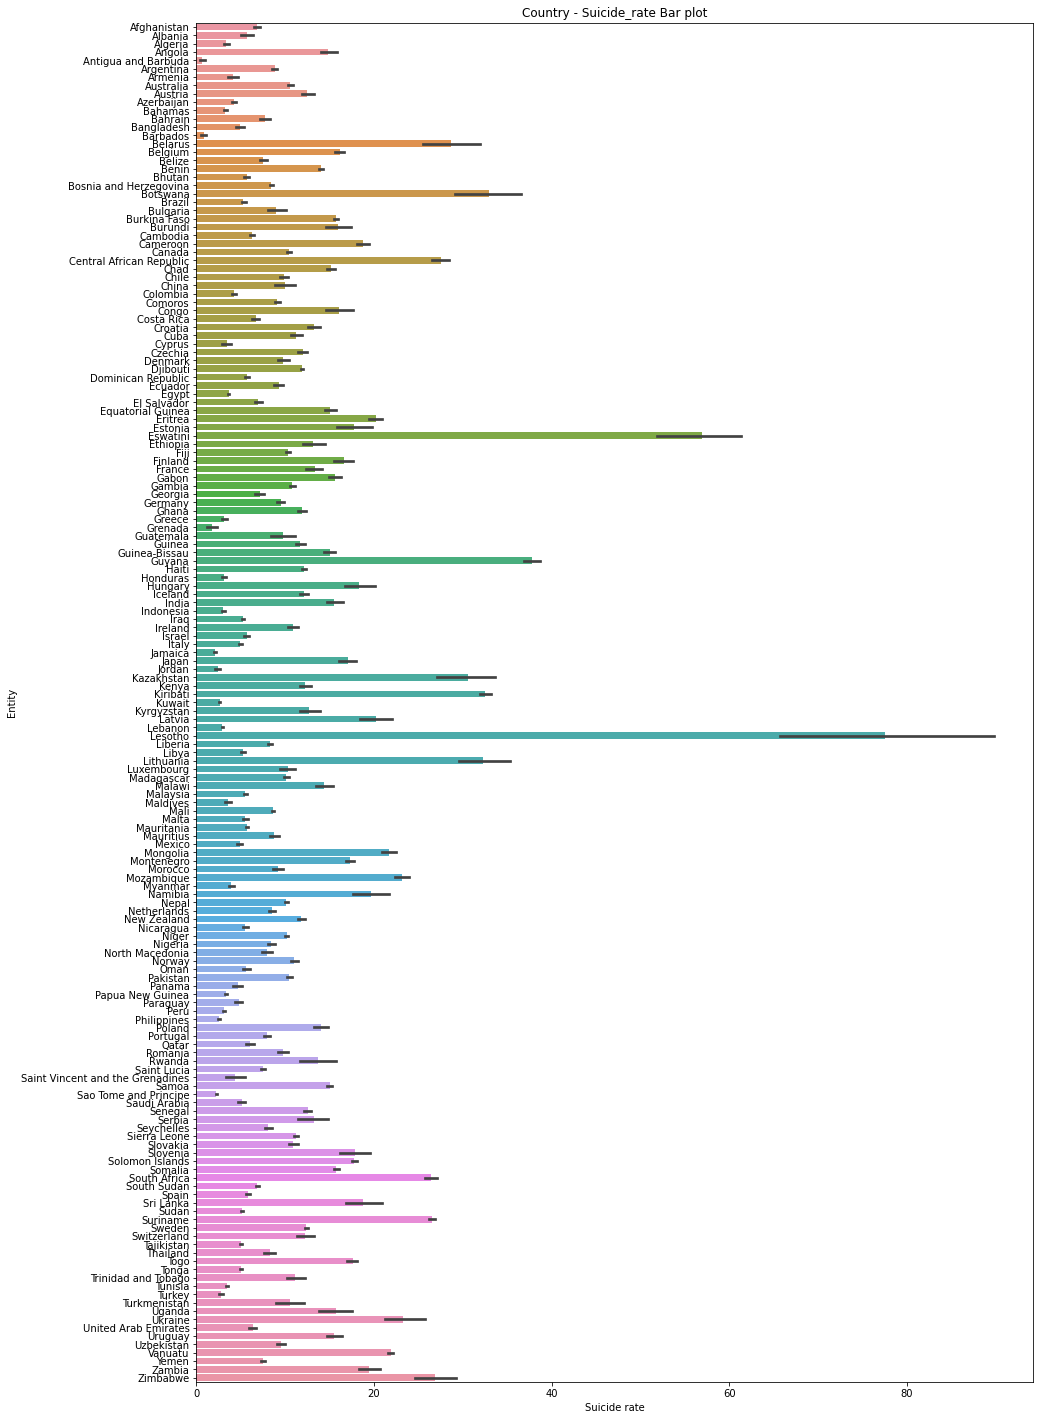

In [62]:
# Country and Suicide rate bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "Suicide rate", y = "Entity", data = df)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

## Feature extraction

In [152]:
train_df = df1.copy()
train_df.head()

,Entity,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income group,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
0,0,0,2.388656,-1.114461,-0.439487,-0.271974,-0.620916,-0.522199,1.589347,0.383767,1,-0.629072,-1.282843,-0.404388
1,0,1,2.385691,-1.094648,-0.440036,-0.271974,-0.620916,-0.522199,1.589347,0.384239,1,-0.629072,-1.254075,-0.384319
2,0,2,2.376928,-1.088871,-0.440325,-0.287167,-0.638894,-0.543751,1.414338,0.454656,1,-0.629072,-1.202096,-0.384319
3,0,3,2.363072,-1.050976,-0.440330,-0.286619,-0.638242,-0.542924,1.204201,0.436423,1,-0.629072,-1.140515,-0.404388
4,0,4,2.347691,-1.018805,-0.440277,-0.285773,-0.637043,-0.540658,1.567122,0.412375,1,-0.629072,-1.091487,-0.394354


In [153]:
# define X and y

X = train_df.drop(['Suicide rate','Entity','Year'], axis=1)
y = train_df['Suicide rate']
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [154]:
X_train.shape, y_train.shape

((2608, 11), (2608,))

In [155]:
X.dtypes

Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)                        float64
Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)                                           float64
Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)             float64
gdp_current                                                                                        float64
gdp_per_capita                                                                                     float64
health expenditure (per capita)                                                                    float64
health expenditure (% GDP)                                                                         float64
unemployment rate                                                                                  float64
Income group                                                                                         int64
Income                               

In [156]:
feature_cols = list(X.columns)

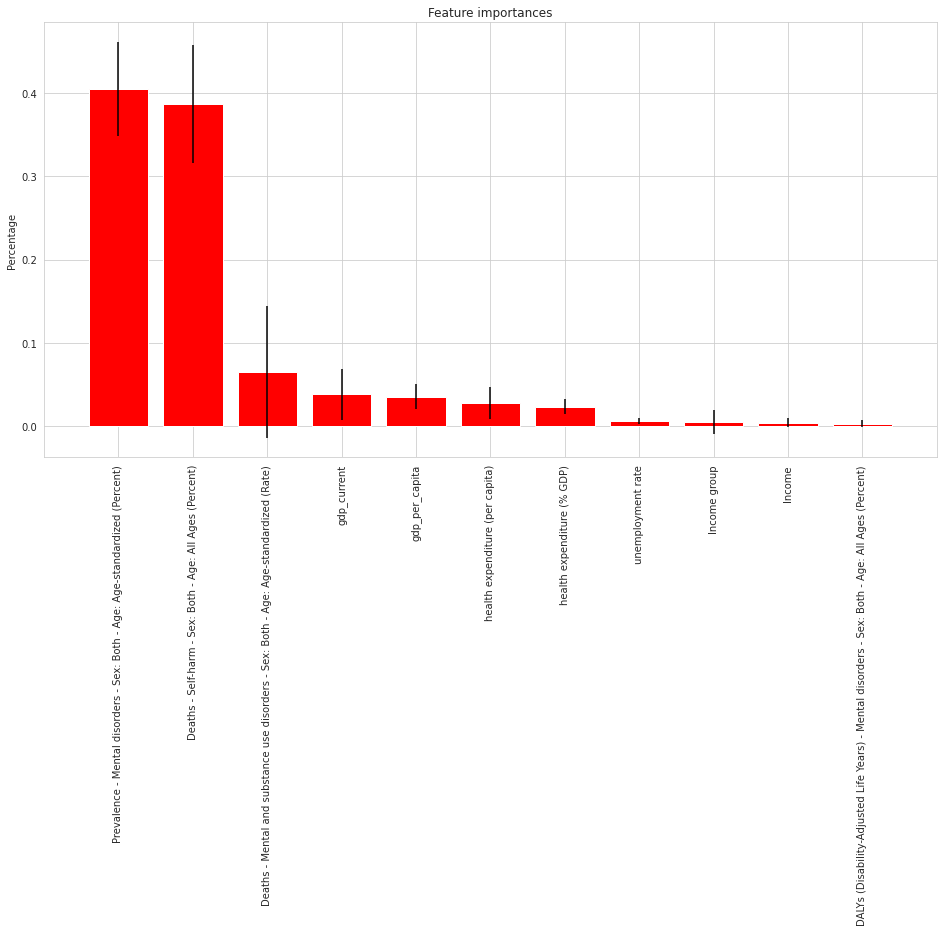

In [157]:
# Build a forest and compute the feature importances
forest = RandomForestRegressor(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.ylabel('Percentage')
plt.show()